Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from itertools import chain
from collections import Counter

Make a pandas object of the netflix dataset.

In [2]:
netflix_data=pd.read_csv("netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


This dataset has 6234 moive/TV-show titles and each with 12 colums of information. A quick look at the dataset tells us this is a dataset without rating and with some NaN values.

# Null handling

Handle any null values in the dataset. 

To view each colums amount of NaN values, we can easily sum each colum.

In [3]:
nan_values = netflix_data.isnull().sum()
print(nan_values)

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


To grasp the amount of Nan values, we sum all columns:

In [4]:
nan_values.sum()

3036

There are 3036 cells within this dataset containing null values. By the column count we can see the director column is responsible for the majority of them. To keep the data clean and without fault, the nan values needs to be removed before modeling.

A common way to "treat" the missing information is Imputation. Impuation is a method within statistics to replace missing data with substituted values. Pandas has a few methods to help clean up the dataset.

In [5]:
netflix_data.director.fillna("No Director", inplace=True)
netflix_data.cast.fillna("No Cast", inplace=True)
netflix_data.country.fillna("Country Unavailable", inplace=True)
netflix_data.dropna(subset=["date_added", "rating"], inplace=True)

Now to take a quick check if any data comes up as missing.

In [6]:
netflix_data.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

# Visualization

https://www.kaggle.com/niharika41298/netflix-visualizations-recommendation-eda
https://jovian.ai/dwiknrd/eda-netflix/v/32?utm_source=embed


* Frequent genre, actor, director
* Amount of movies vs Genre
* Year wise analysis, both movies & tv-shows
* Show what country
* 

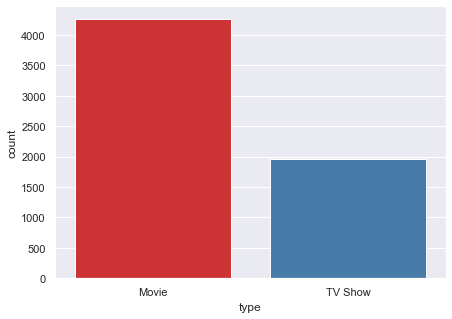

In [7]:
sns.set(style="darkgrid")
plt.figure(figsize=(7, 5))
ax = sns.countplot(x="type", data=netflix_data, palette="Set1")
plt.show()

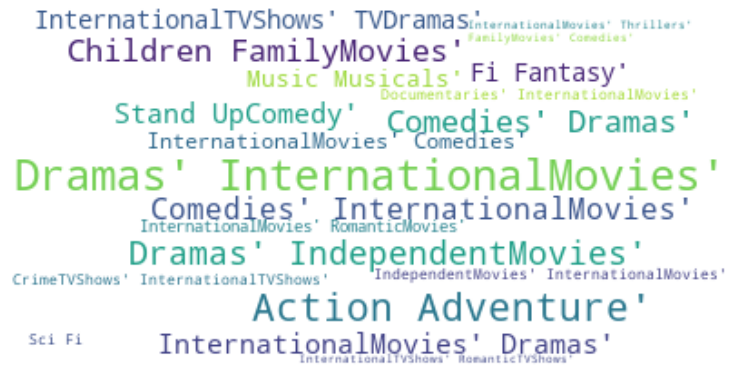

In [8]:
genres=list(netflix_data.listed_in)
genre=[]

for i in genres:
    i=i.split(',')
    for j in i:
        genre.append(j.replace(' ',""))
#g=Counter(genre)

text = list(set(genre))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=20,background_color="white").generate(str(genre))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

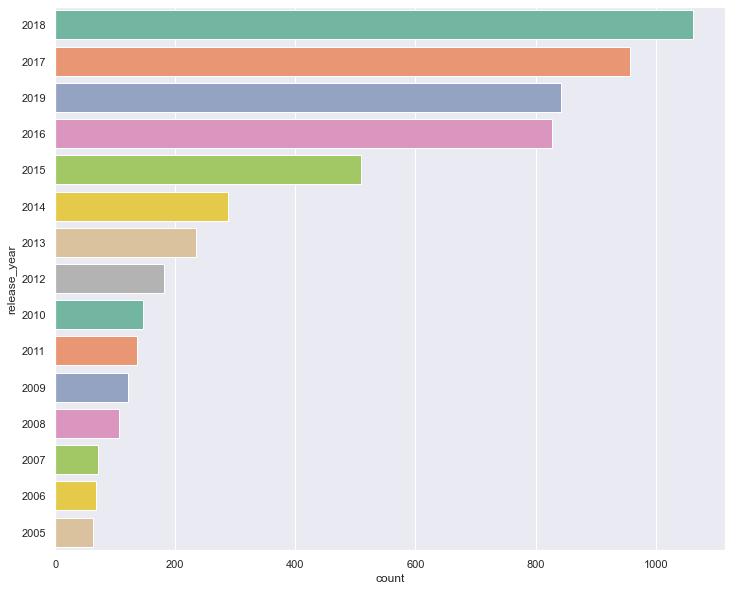

In [9]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_data, 
                   palette="Set2", order=netflix_data.release_year.value_counts().index[0:15])

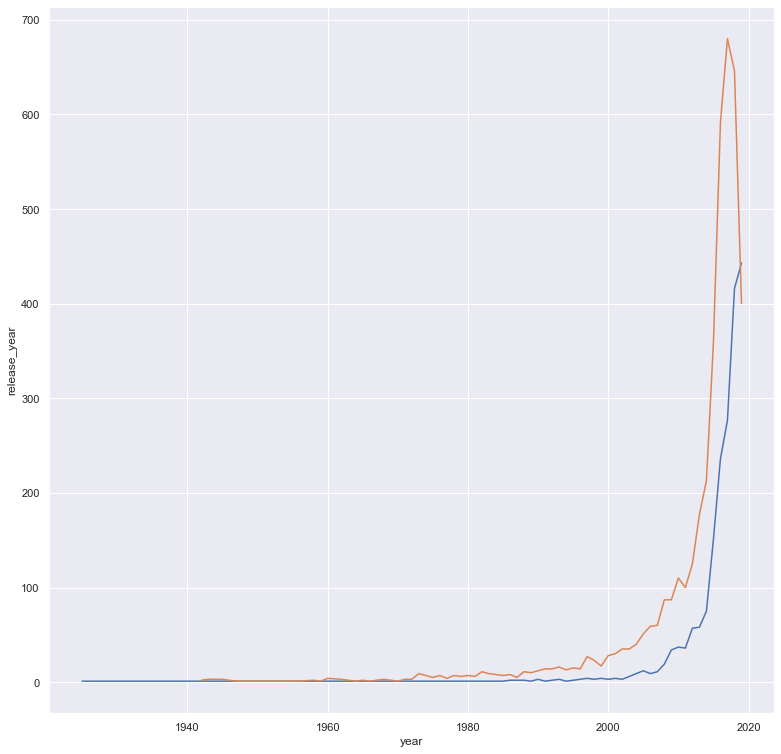

In [10]:
netflix_movies_df = netflix_data[netflix_data.type.str.contains("Movie")]
movies_year_df = netflix_movies_df.release_year.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
movies_year_df = movies_year_df[movies_year_df != 2020]

netflix_shows_df = netflix_data[netflix_data.type.str.contains("TV Show")]
shows_year_df = netflix_shows_df.release_year.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
shows_year_df = shows_year_df[shows_year_df != 2020]

sns.lineplot(data=shows_year_df, x='year', y='release_year')
sns.lineplot(data=movies_year_df, x='year', y='release_year')
plt.show()

C:\Users\Steffen\anaconda3\envs\dat540\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


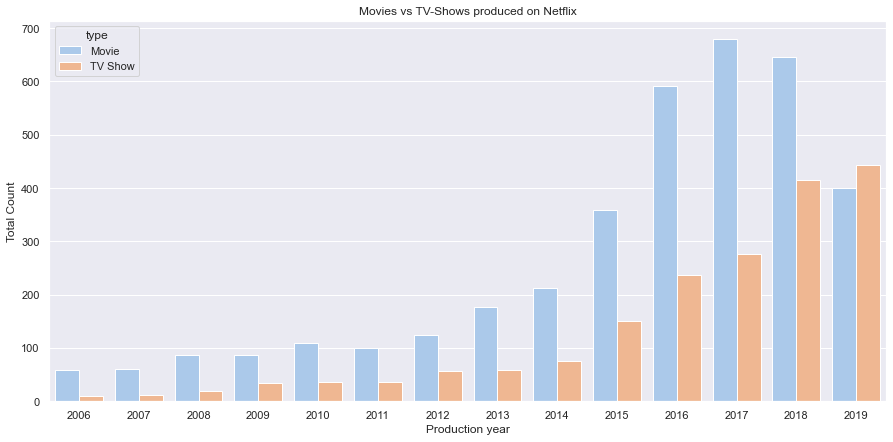

In [11]:
order =  sorted(netflix_data.release_year.unique())[-15:-1]
plt.figure(figsize=(15,7))
g = sns.countplot(netflix_data.release_year, hue=netflix_data.type, order=order, palette="pastel");
plt.title("Movies vs TV-Shows produced on Netflix")
plt.xlabel("Production year")
plt.ylabel("Total Count")
plt.show()

## Rating vs Genre

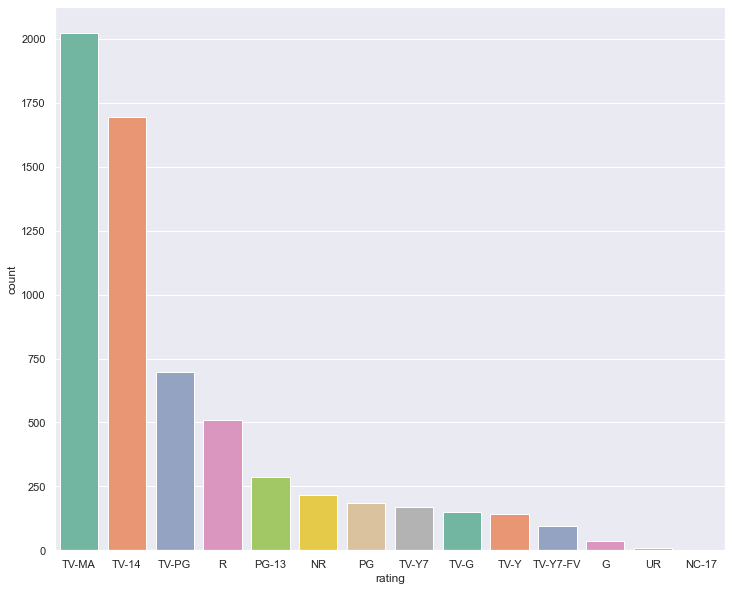

In [12]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_data, palette="Set2", order=netflix_data['rating'].value_counts().index[0:15])

In [13]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

movie_rating = netflix_data['rating'].value_counts()
#tv_rating = tv_show['rating'].value_counts()[rating_order].fillna(0)

In [14]:
replacements = {
        " ": "",
        "TV": "",
        "''": "",
        "Shows": "",
        "Movies": "",
        "International": ""
    }

temp2 = netflix_data.copy()
temp2.listed_in = temp2.listed_in.replace(replacements, regex=True).str.split(',').apply(lambda x: [i for i in x if i != ''])

In [15]:
temp3 = temp2.explode('listed_in')
temp3 = temp3.rename(columns={'listed_in': 'Genre', 'rating': 'PG-Rating'})
df = temp3.groupby(['Genre','PG-Rating']).size().unstack(fill_value=0)
df = df[df > 100].fillna(0)

df

PG-Rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
Genre,,,,,,,,,,,,,,
Action&Adventure,0.0,0.0,0.0,0.0,0.0,124.0,182.0,0.0,224.0,0.0,0.0,0.0,0.0,0.0
AnimeFeatures,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AnimeSeries,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
British,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Children&Family,0.0,0.0,0.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Classic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Classic&Cult,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comedies,0.0,0.0,0.0,0.0,103.0,118.0,463.0,0.0,409.0,179.0,0.0,0.0,0.0,0.0
Crime,0.0,0.0,0.0,0.0,0.0,0.0,122.0,0.0,228.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Genre vs PG Rating')

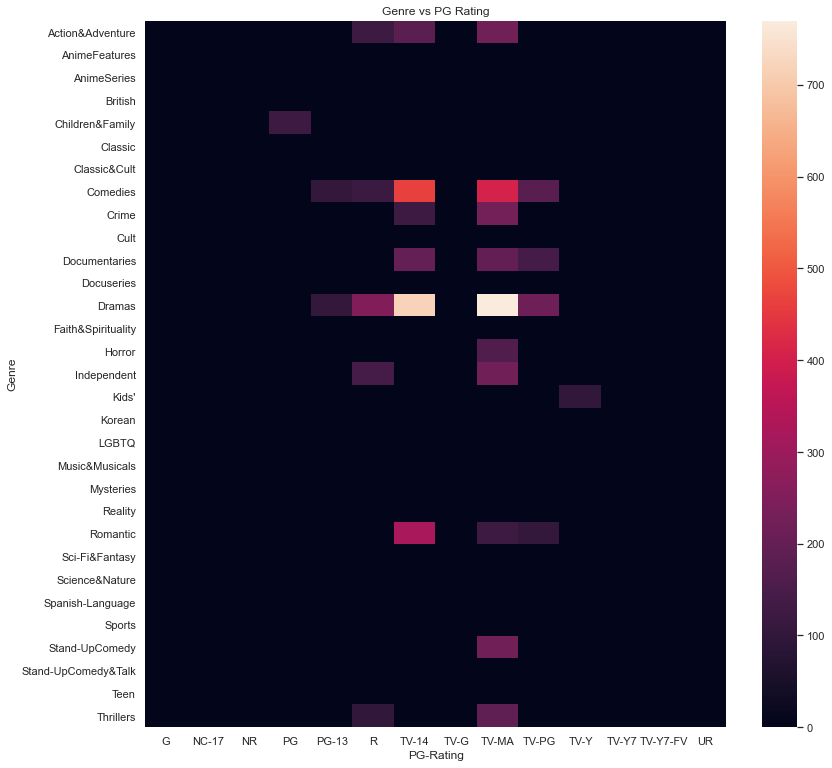

In [16]:
sns.heatmap(df).set_title("Genre vs PG Rating")

In [17]:
from collections import Counter



0        [norm, of, the, north:, king, sized, adventure]
1                        [jandino:, whatever, it, takes]
2                                  [transformers, prime]
3                  [transformers:, robots, in, disguise]
4                                         [#realityhigh]
                              ...                       
6218                        [talking, tom, and, friends]
6219                              [pokémon, the, series]
6220                                      [justin, time]
6221    [terrace, house:, boys, &, girls, in, the, city]
6222                                             [weeds]
Name: title, Length: 6214, dtype: object


In [57]:

word_freq = temp4.title.str.lower().str.split(expand=True).stack().value_counts()[:20]
index = word_freq.index
values = word_freq.values

word_freq[word_freq[:20].gt(100)].index

Index(['the', 'of', 'a', 'in', 'and', 'to', 'my', '&', 'love'], dtype='object')

C:\Users\Steffen\anaconda3\envs\dat540\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

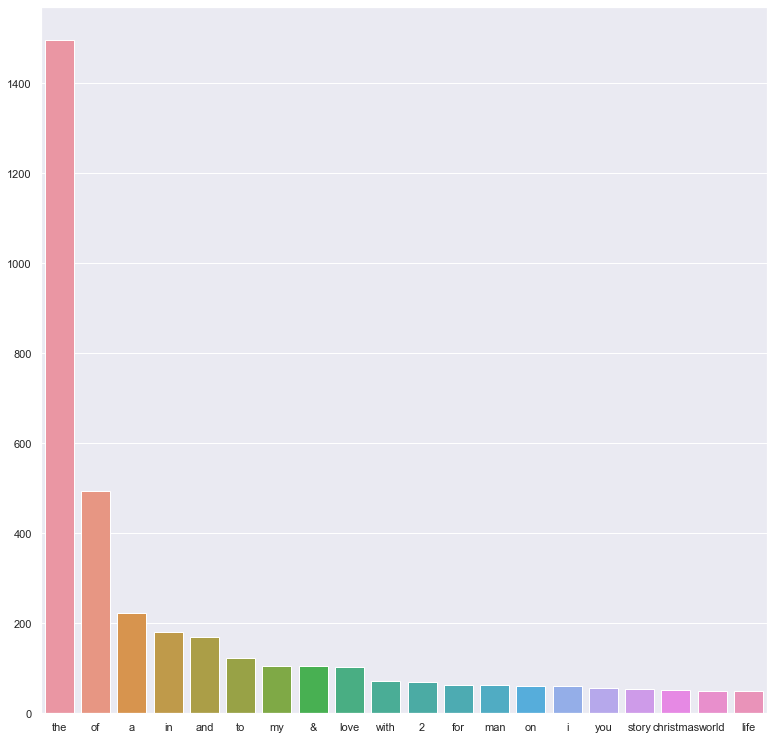

In [50]:
sns.barplot(index, values)

# Neural Network

https://medium.com/swlh/text-classification-using-the-bag-of-words-approach-with-nltk-and-scikit-learn-9a731e5c4e2f

* Remove none alphabetic characters? 
* make all lower case?


Lets look at the data on a much smaller scale, as an example.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression